## Supplement 3: Regression

In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 3.2 Programming Task: Gradient Descent
Consider the function $J(\boldsymbol{w})=J(w_1, w_2) =-e^{-\frac{1}{100}(w_1^2 + w_2^2 -w_1w_2 - 2w_1  + 4w_2 + 5)} - 2 e^{-(w_1^2  + w_2^2  - 4w_1- 9 w_2 + 25)}.$

i\. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour plot using the Matplotlib module. 

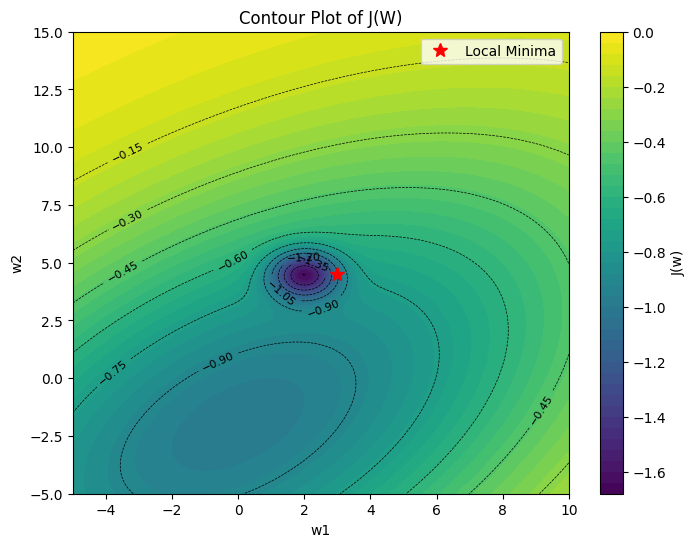

In [19]:
# TODO: Define function J(w)
def J(w1, w2):
    A = -0.01 * (w1 **2 + w2 ** 2 - w1 * w2 - 2 * w1 + 4 * w2 + 5)
    B = - ( w1 ** 2 + w2 ** 2 - 4 * w1 - 9 * w2 + 25)
    return -np.exp(A) - 2 * np.exp(B)

# TODO: Prepare contours plot of J(w)
w1_vals = np.linspace(-5, 10, 100)
w2_vals = np.linspace(-5, 15, 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = J(W1, W2)

plt.figure(figsize=(8, 6))
contour_filled = plt.contourf(W1, W2, Z, levels=50, cmap='viridis')
contour_lines = plt.contour(W1, W2, Z, levels=15, colors='black', linewidths=0.5)
plt.title(f'Contour Plot of J(W)')
plt.xlabel('w1')
plt.ylabel('w2')
plt.colorbar(contour_filled, label='J(w)')
plt.clabel(contour_lines, inline=1, fontsize=8)
plt.plot(3.0, 4.5, 'r*', markersize=10, label='Local Minima')
plt.legend()
plt.show()


ii\. Obtain the gradient of the above function by hand.
            
  $Hint:   \nabla J(\boldsymbol{w}) = \left(
  \begin{array}{c}
    \frac{\partial J(\boldsymbol{w})}{\partial w_1} \\ %
    \frac{\partial J(\boldsymbol{w})}{\partial w_2}
  \end{array} \right)
$

iii\. Implement gradient descent algorithm described in the lecture to find the minimum of this
            function using the NumPy module. Plot the location of the new $\boldsymbol{w}$ after each iteration on the contour plot.

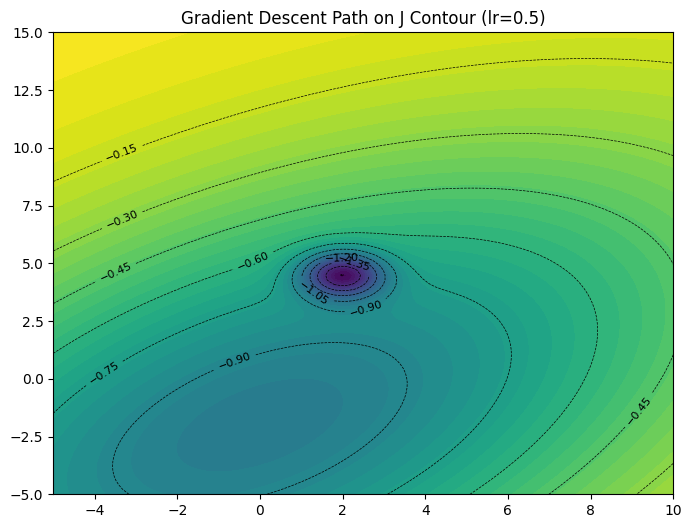

Final weights for Path 1 (Start [0.0, 0.0]): w1=0.3031, w2=-0.7333
Final weights for Path 2 (Start [-4.0, -4.0]): w1=-2.8958, w2=-3.8863


In [20]:
# TODO: Define function gradient_J(w)
def gradient_J(w1, w2):
    """
    Computes the gradient vector [dJ/dw1, dJ/dw2] for J(w1, w2).
    """
    A = -(1/100) * (w1**2 + w2**2 - w1*w2 - 2*w1 + 4*w2 + 5)
    dA_dw1 = -(1/100) * (2*w1 - w2 - 2)
    dA_dw2 = -(1/100) * (2*w2 - w1 + 4)
    
    B = -(w1**2 + w2**2 - 4*w1 - 9*w2 + 25)
    dB_dw1 = -(2*w1 - 4)
    dB_dw2 = -(2*w2 - 9)
    
    dJ_dw1 = -np.exp(A) * dA_dw1 - 2 * np.exp(B) * dB_dw1
    dJ_dw2 = -np.exp(A) * dA_dw2 - 2 * np.exp(B) * dB_dw2
    
    return np.array([dJ_dw1, dJ_dw2])


# TODO: Define the gradient descent algorithm as function
def gradient_descent(start_w, learning_rate, max_iter):
    """
    Runs the gradient descent algorithm and records the weight history.
    """
    # TODO: Train w 
    # Store each update of w in an array to make plot later.
    w = np.array(start_w, dtype=float)
    w_history = [w.copy()]
    
    for i in range(max_iter):
        grad = gradient_J(w[0], w[1])
        
        w -= learning_rate * grad
        
        w_history.append(w.copy())
        
        if np.linalg.norm(learning_rate * grad) < 1e-6:
            print(f"Converged after {i+1} iterations.")
            break
            
    return np.array(w_history)    

start_w1 = [0.0, 0.0] 
learning_rate1 = 0.5
max_iter1 = 50
history1 = gradient_descent(start_w1, learning_rate1, max_iter1)

start_w2 = [-4.0, -4.0] 
learning_rate2 = 0.5
max_iter2 = 50
history2 = gradient_descent(start_w2, learning_rate2, max_iter2)

# TODO: Prepare contour plot and mark each weight update on the plot.

plt.figure(figsize=(8, 6))

contour_filled = plt.contourf(W1, W2, Z, levels=50, cmap='viridis')
contour_lines = plt.contour(W1, W2, Z, levels=15, colors='black', linewidths=0.5)
plt.clabel(contour_lines, inline=1, fontsize=8)
plt.title(f'Gradient Descent Path on J Contour (lr={learning_rate1})')
plt.show()



print(f"Final weights for Path 1 (Start {start_w1}): w1={history1[-1, 0]:.4f}, w2={history1[-1, 1]:.4f}")
print(f"Final weights for Path 2 (Start {start_w2}): w1={history2[-1, 0]:.4f}, w2={history2[-1, 1]:.4f}")

### 3.3 Programming Task: Housing Price Regression Problem
The file __house\_prices.txt__ contains a data set of house prices: the
first column is the house size in square feet, the second column is the number
of bedrooms, the third column is the price in USD.


i\. Plot house prices vs. house sizes as a scatter plot.

In [21]:
data = np.loadtxt('house_prices.txt', delimiter=',')

X_unscaled = data[:, 0:1] 
y_unscaled = data[:, 2]   

mu_X = np.mean(X_unscaled, axis=0)
sigma_X = np.std(X_unscaled, axis=0)
mu_y = np.mean(y_unscaled)
sigma_y = np.std(y_unscaled)

X = (X_unscaled - mu_X) / sigma_X
y = (y_unscaled - mu_y) / sigma_y

X0 = np.ones((X.shape[0], 1))
X = np.hstack((X0, X))

n = X.shape[0]

print(f"X shape (with bias): {X.shape}, y shape: {y.shape}")

X shape (with bias): (47, 2), y shape: (47,)


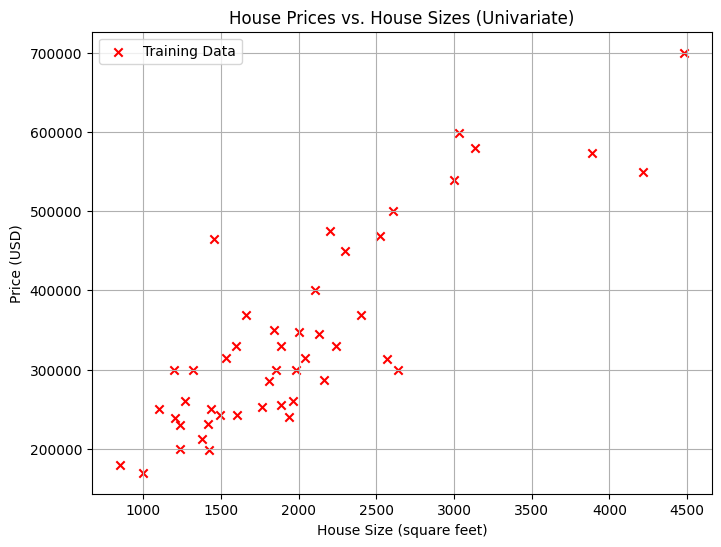

In [22]:
plt.figure(figsize=(8, 6))

plt.scatter(X_unscaled, y_unscaled, marker='x', color='red', label='Training Data')

plt.xlabel('House Size (square feet)')
plt.ylabel('Price (USD)')
plt.title('House Prices vs. House Sizes (Univariate)')
plt.legend()
plt.grid(True)
plt.show()

ii\. Next, fit the linear regression to these data points. You should not use
    any other python module besides NumPy to find the weights of the model.

* Consider the linear model $h_{\boldsymbol{w}}(\boldsymbol{x})=w_0 x_0 + w_1 x_1={\boldsymbol{w}}^\top\boldsymbol{x}$,
    where $x_1$ is the house size in the first column of __house\_prices.txt__, $x_0=1$ by convention, $\boldsymbol{x}={[x_0,x_1]}^\top$, 
    and $\boldsymbol{w}={[w_0, w_1]}^\top$. Define the cost function on the dataset:
 
    $J(\boldsymbol{w})=\frac{1}{2}\sum_{i=1}^{n} \left(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})-y^{(i)}\right)^2.$

 
    Above, $n$ is the number of rows in __house_prices.txt__, $y^{(i)}$
    is the house price given in the third column of the file, $\boldsymbol{x}^{(i)} = {[1\
    x_1^{(i)}]}$ and $x_1^{(i)}$ is the house size from the first column and
    $i$th row of the file. $h_{\boldsymbol{w}}(\cdot)$ represents the linear regression model. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour
    plot. You may rescale the data if required. 

In [23]:
# TODO: Define function J(w)
def J_linear(X, y, w):
    """
    Cost function for Univariate Linear Regression (J(w0, w1)).
    J(w) = 1/2 * sum((X@w - y)**2)
    """
    predictions = X @ w
    error = predictions - y
    
    cost = 0.5 * np.sum(error**2)
    return cost

# TODO: Define function gradient_J(w)
def gradient_linear(X, y, w):
    """
    Computes the gradient of the cost function J(w).
    Gradient = X.T @ (X@w - y)
    """
    error = X @ w - y
    
    grad = X.T @ error
    return grad
# TODO: Plot the cost function


* Start with some initial value $\boldsymbol{w}$
and run the steps of the gradient descent algorithm (you may reuse revelant
parts of the solution from task 3.2). Plot the location of each new $\boldsymbol{w}$ on
the contour plot similar to the previous task.

Converged after 2 iterations.
Final weights (GD): w0=-0.0000, w1=0.8550
Final cost (GD): 6.3214


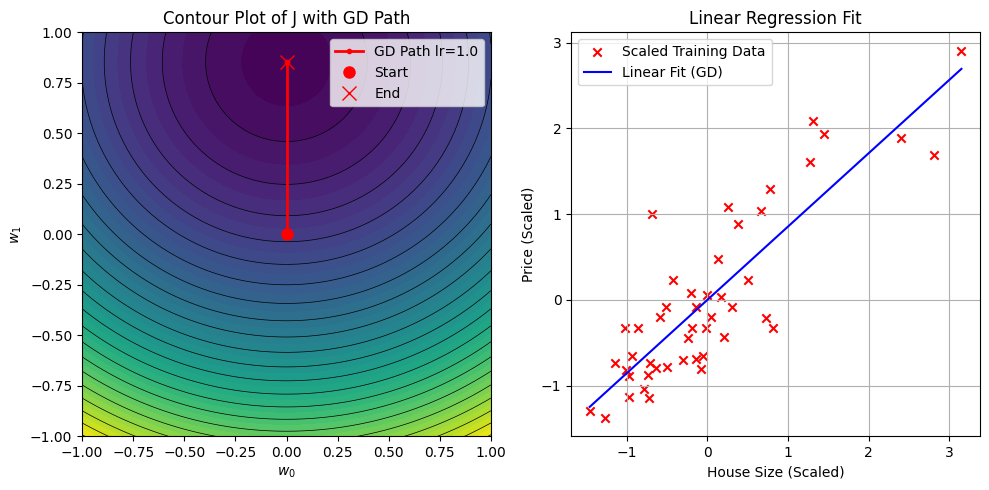

In [24]:

# TODO: Train w 
# Store each update of w in an array to make plot later.
def gradient_descent_linear(X, y, start_w, learning_rate, max_iter):
    """
    Runs the gradient descent algorithm for linear regression.
    """
    w = np.array(start_w, dtype=float)
    w_history = [w.copy()]
    
    for i in range(max_iter):
        grad = gradient_linear(X, y, w) / n 
        
        w -= learning_rate * grad
        
        w_history.append(w.copy())
        
        if np.linalg.norm(learning_rate * grad) < 1e-6:
            print(f"Converged after {i+1} iterations.")
            break
            
    return np.array(w_history)



# TODO: Prepare contour plot and mark each weight update on the plot.
w0_range = np.linspace(-1, 1, 100)
w1_range = np.linspace(-1, 1, 100)
W0, W1 = np.meshgrid(w0_range, w1_range)
Z_linear = np.zeros(W0.shape)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_curr = np.array([W0[i, j], W1[i, j]])
        Z_linear[i, j] = J_linear(X, y, w_curr)

start_w = [0.0, 0.0]
learning_rate = 1.0 
max_iter = 100

history_linear = gradient_descent_linear(X, y, start_w, learning_rate, max_iter)

final_w_gd = history_linear[-1]
final_cost_gd = J_linear(X, y, final_w_gd)
print(f"Final weights (GD): w0={final_w_gd[0]:.4f}, w1={final_w_gd[1]:.4f}")
print(f"Final cost (GD): {final_cost_gd:.4f}")


# OPTIONAL: Plot the resulting linear regression function
plt.figure(figsize=(10, 5))

# Subplot 1: Contour Plot with GD Path
plt.subplot(1, 2, 1)
contour_filled = plt.contourf(W0, W1, Z_linear, levels=50, cmap='viridis')
contour_lines = plt.contour(W0, W1, Z_linear, levels=20, colors='black', linewidths=0.5)
plt.plot(history_linear[:, 0], history_linear[:, 1], 'r-o', linewidth=2, markersize=3, label=f'GD Path lr={learning_rate}')
plt.plot(history_linear[0, 0], history_linear[0, 1], 'ro', markersize=8, label='Start')
plt.plot(history_linear[-1, 0], history_linear[-1, 1], 'rx', markersize=10, label='End')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Contour Plot of J with GD Path')
plt.legend()


# Subplot 2: Linear Fit on Scatter Plot (using scaled data)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, marker='x', color='red', label='Scaled Training Data')

# Calculate the regression line using the final GD weights
x_fit = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_fit = np.vstack([np.ones_like(x_fit), x_fit]).T
y_fit = X_fit @ final_w_gd

plt.plot(x_fit, y_fit, 'b-', label='Linear Fit (GD)')
plt.xlabel('House Size (Scaled)')
plt.ylabel('Price (Scaled)')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


* Experiment by making changes to the learning rate of the gradient descent
algorithm. Observe how the path of the algorithm changes. Make sure that the
algorithm converges to the true minimum of the function $J(\boldsymbol{w})$.

In [25]:
# TODO: Define alphas (learning rates) to test.

# TODO: Repeat experiment for each alpha and observe the contour plot in each case. You may use subplots in Matplotlib for the plots.

iii\. Determine the weights of the model using the closed form solution for $\boldsymbol{w}$:
\begin{align}
    \hat{\mathbf{w}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty
\end{align}
Above, $\mathbf{y} = [y^{(1)},..., y^{(n)}]^T$ and $\mathbf{X}$ is the data matrix whose rows are $x^{(i)}$. Is this the same point that you have found above using gradient descent?

In [26]:
# TODO: Compute the closed form solution

XTX = X.T @ X
XTX_inv = np.linalg.pinv(XTX)
XTy = X.T @ y

weights_closed_form = XTX_inv @ XTy

cost_closed_form = J_linear(X, y, weights_closed_form)

# Print and compare results
print(f"Closed Form Solution Weights: w0={weights_closed_form[0]:.4f}, w1={weights_closed_form[1]:.4f}")
print(f"Closed Form Solution Cost: {cost_closed_form:.4f}")
print("-" * 30)
print(f"Gradient Descent Final Weights: w0={final_w_gd[0]:.4f}, w1={final_w_gd[1]:.4f}")
print(f"Gradient Descent Final Cost: {final_cost_gd:.4f}")


Closed Form Solution Weights: w0=-0.0000, w1=0.8550
Closed Form Solution Cost: 6.3214
------------------------------
Gradient Descent Final Weights: w0=-0.0000, w1=0.8550
Gradient Descent Final Cost: 6.3214


### Therefore, weights obtained from Gradient Descent and closed form normal equation are equal.